# <center>Census Income Classification 💲 <center>

<center><img width="800px" src="https://images.pexels.com/photos/6214908/pexels-photo-6214908.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"></center>

# About Dataset

* **Dataset Characteristics** : Multivariate

* **Subject Area** : Social

* **Associated Tasks** : Classification

* **Attribute Type** :Categorical, Integer

* **Instances** : 48842

* **Attributes** : 14

##### Additional Information

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

# Importing the Essential Libraries, Metrics and Models

In [1]:
import numpy as np
!pip install --upgrade pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

C:\Users\Faiz\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the Data

In [2]:
df = pd.read_csv("adult.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(48842, 15)

***Checking the dtypes of columns***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


***Getting the statistical summary of dataset.***

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

### Handling Missing Values and Duplicates

In [7]:
df.isnull().sum().sum()

0

***In this dataset, missing values are represented with '?', Hence no missing values detected as these are being consdered as string dtype.***

In [8]:
df.duplicated().sum()

52

***Checking for duplicates in data and it can be easily seen that there are 52 duplicated values.***

In [9]:
df = df.drop_duplicates()

***Dropped all the duplicated values from the dataset and checking the shape of the df.***

In [10]:
df.shape

(48790, 15)

***Checking for "?" values in the data.***

In [11]:
df["occupation"].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [12]:
df["workclass"].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
df["native-country"].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [14]:
df[(df["workclass"] == "?") | (df["occupation"] == "?")]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
df[(df["workclass"] != "?") & (df["occupation"] == "?")]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


***Handling '?' values for different columns.***

In [16]:
new_value = "Inexperienced"
df.loc[df['workclass'] == 'Never-worked', 'occupation'] = new_value

In [17]:
missing_values = df[df["workclass"] == "?"].index

df.drop(index = missing_values, axis = 0, inplace = True)

In [18]:
mode = df["native-country"].mode()

df["native-country"] = df["native-country"].replace("?", "United-States")

***Checking value counts for different columns after handling missing values and get a better understanding of data.***

In [19]:
def value_count_of_each_col(df):
    cols = df.columns
    for i in cols:
        print(df[i].value_counts())
        print("-----------------------------------------")
        
value_count_of_each_col(df)

age
36    1312
31    1299
33    1299
35    1293
34    1267
      ... 
88       6
85       5
89       1
87       1
86       1
Name: count, Length: 74, dtype: int64
-----------------------------------------
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
-----------------------------------------
fnlwgt
203488    21
120277    19
126569    18
125892    18
126675    17
          ..
132606     1
199765     1
46857      1
89392      1
257302     1
Name: count, Length: 27039, dtype: int64
-----------------------------------------
education
HS-grad         14960
Some-college    10026
Bachelors        7761
Masters          2589
Assoc-voc        1977
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           844
Prof-school       810
9th               687
12th              597
Do

***Plan of creating a separate category for some values***

**'workclass'** :-
* local /state/ federal --> Govt employee
* self emp not inc / inc -> self emp
* Without-pay /Never-worked --> Not earning

**'education'** :-
* 9/10/11/12th/HS-Grad --> HS Grad
* Some-college/assoc-voc/acdm --> some college
* masters/prof-school --> masters
* preschool/1/4th --> junior schooling
* 5/6/7/8th --> secondary schooling

**'relationship'** :-
* Husband /wife --> Spouse

**'race'** :-
* Asian-Pac-Islander /Amer-Indian-Eskimo /Other --> Others

**native-country'** make a category:-
* category for less than 100

**'fnlwgt'** & **'educational-num'** --> drop

# Data Visualization

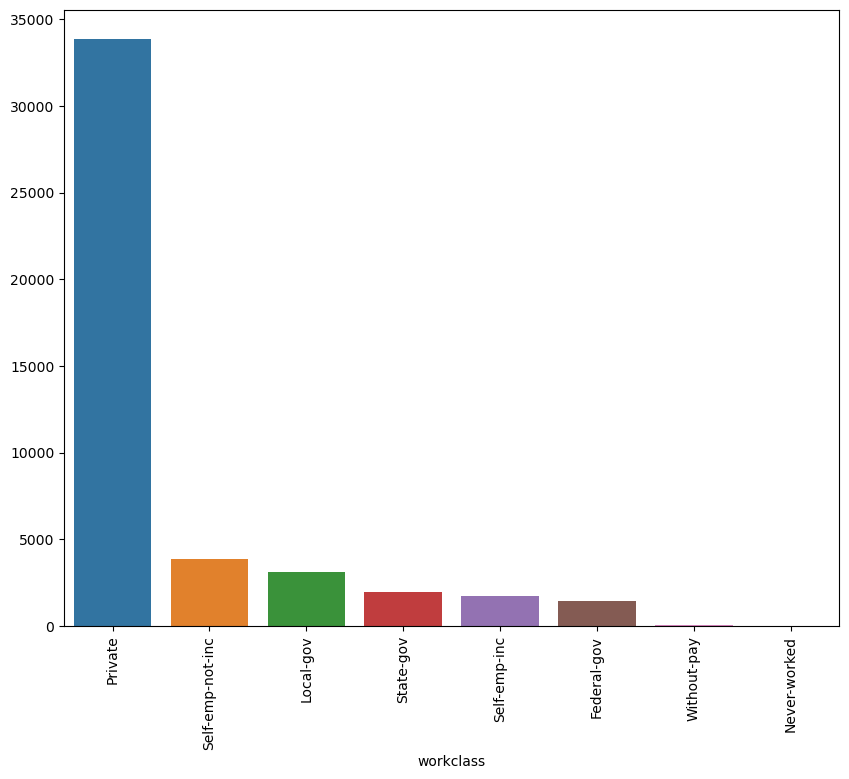

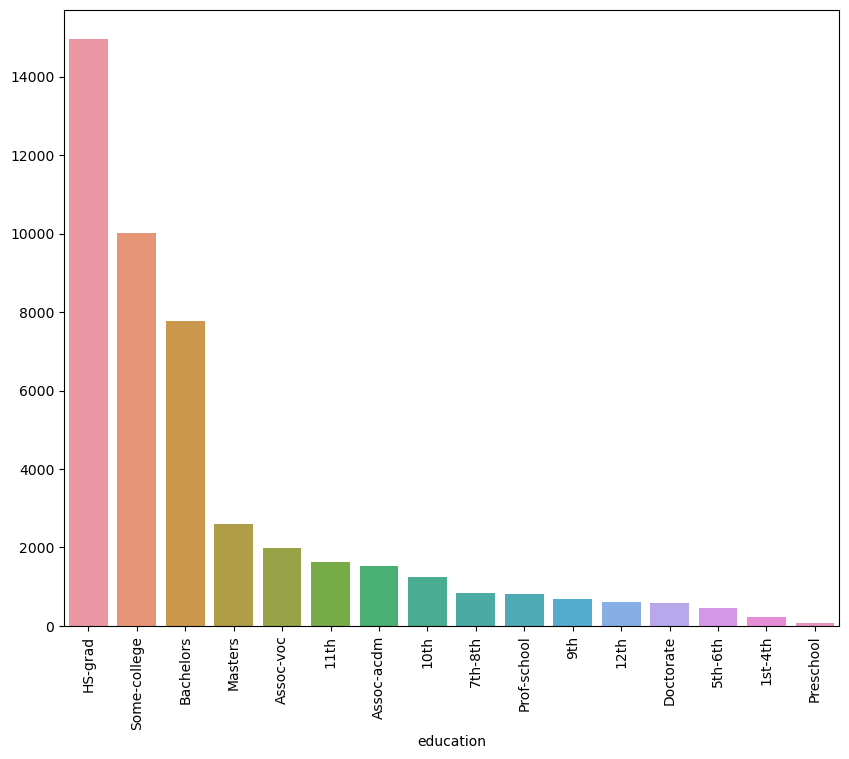

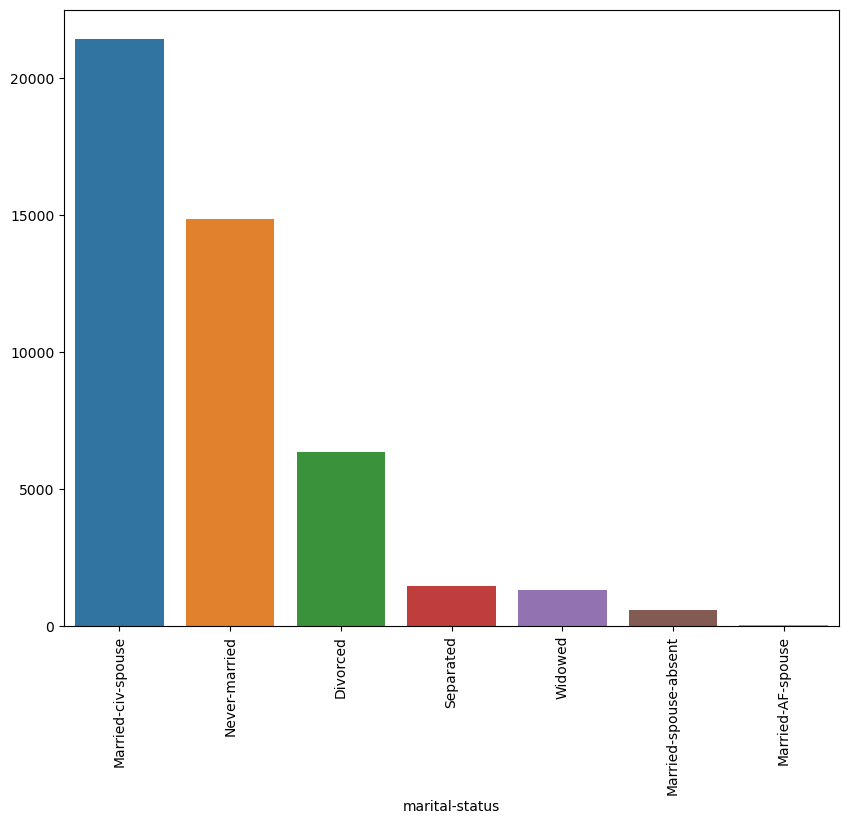

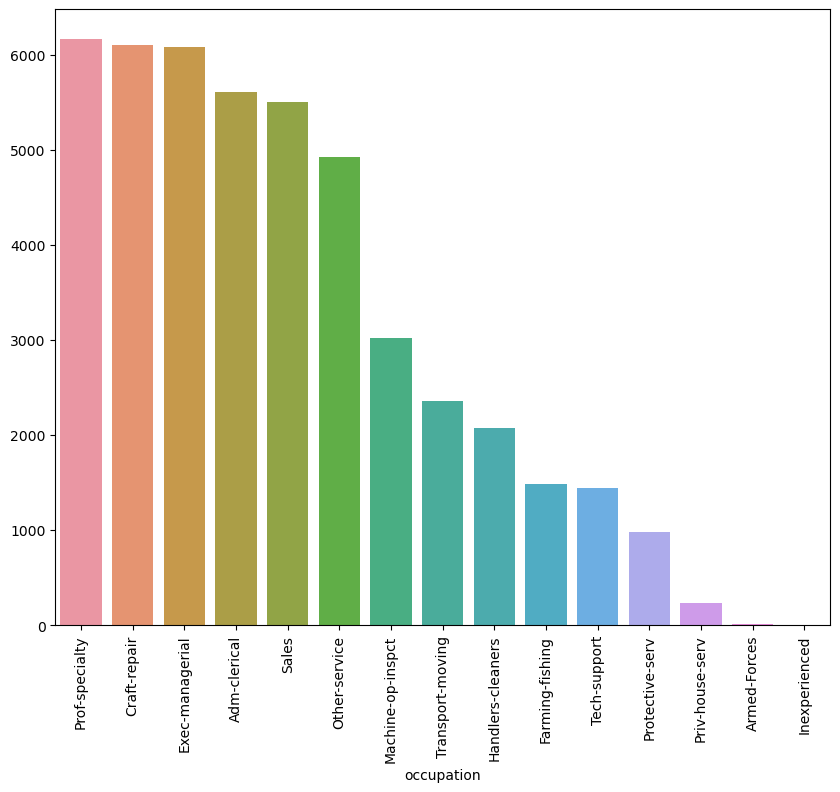

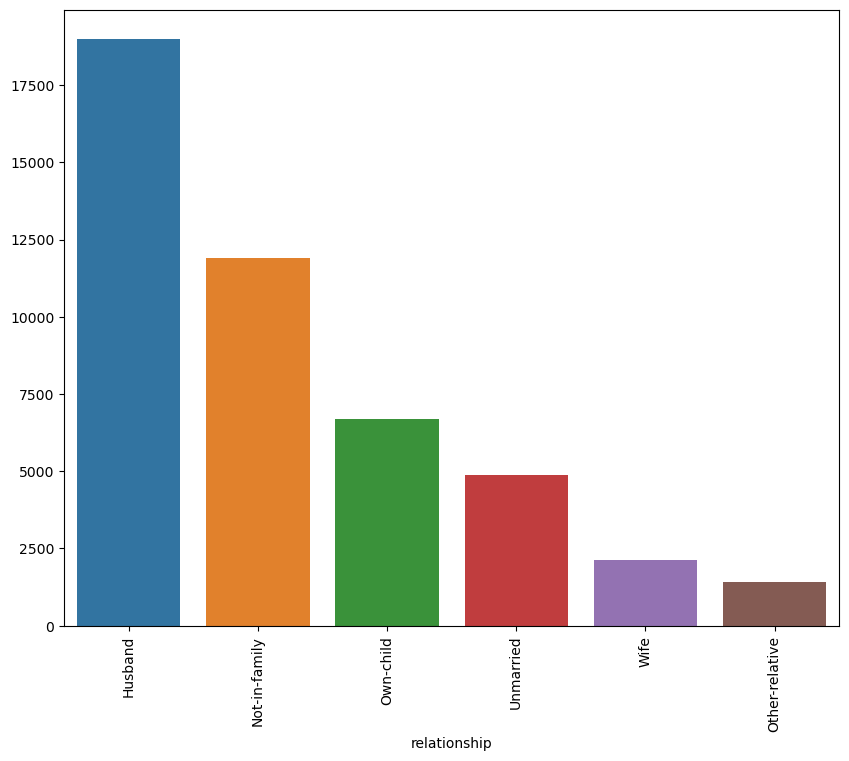

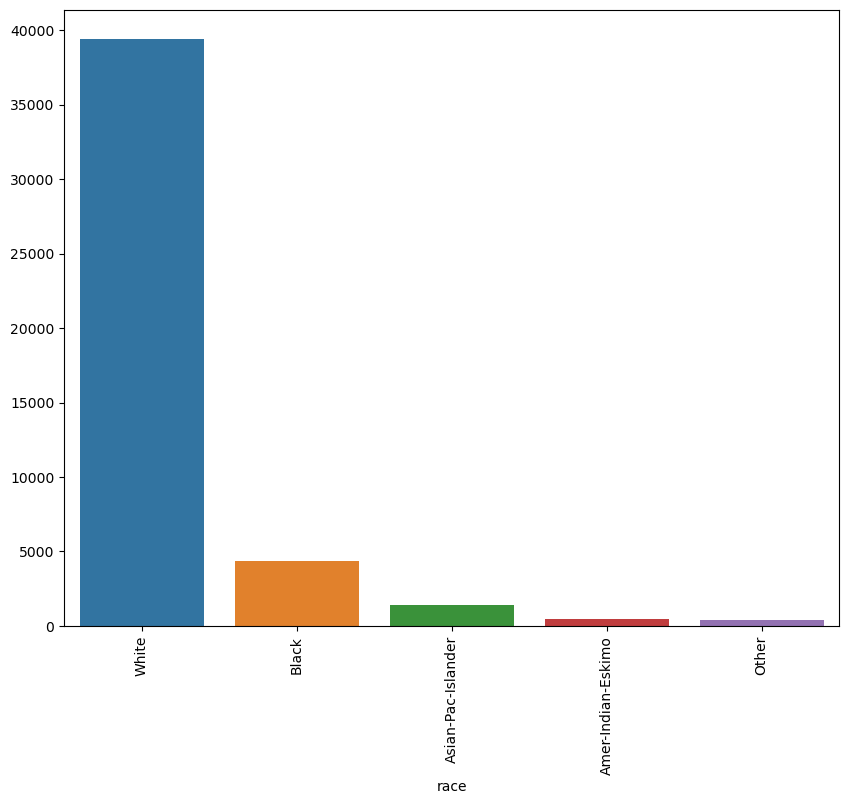

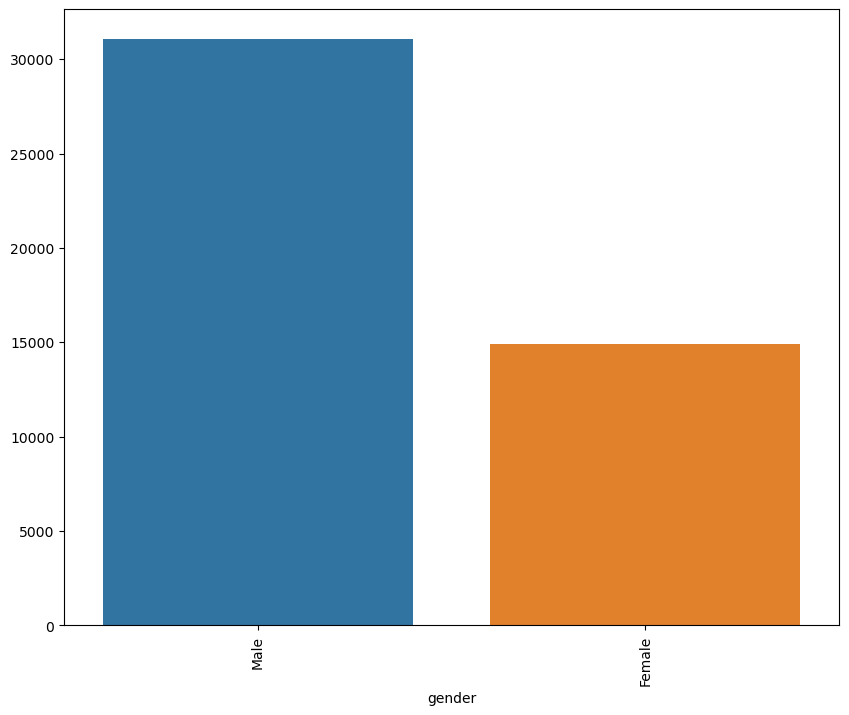

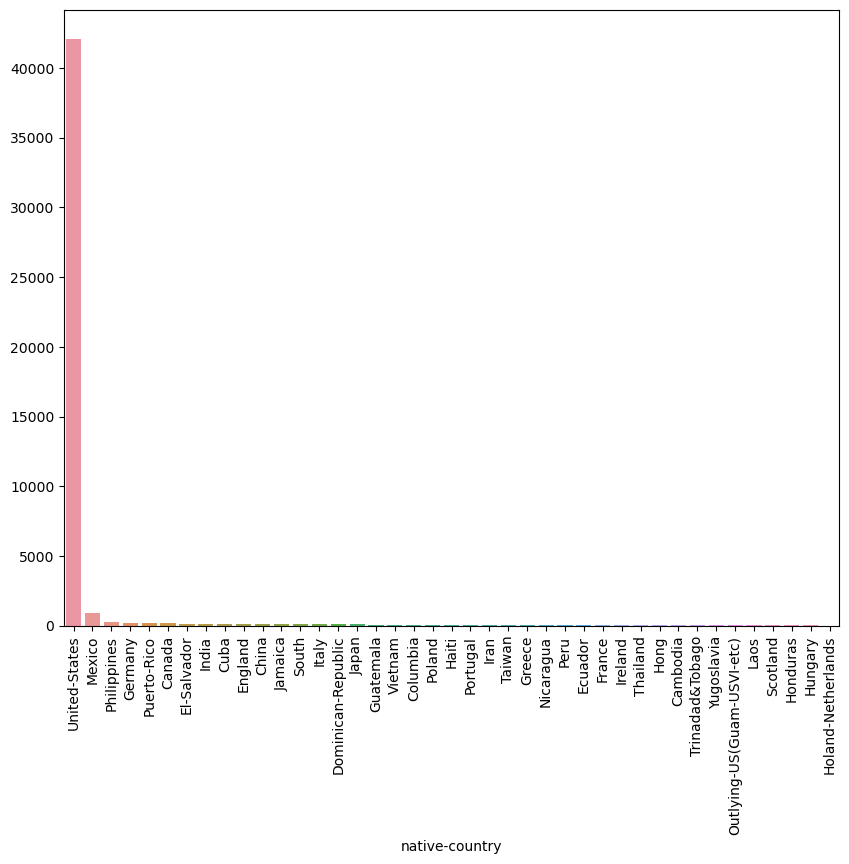

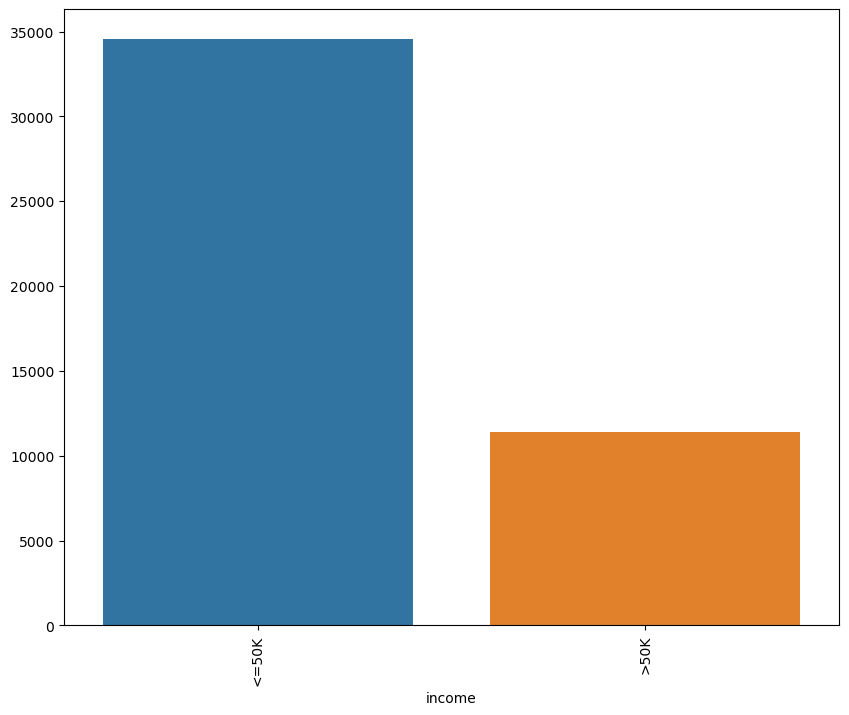

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [20]:
cols = []
for i in df.columns:
    if (df[i].dtype == 'O'):
        cols.append(i)
    
for i in cols:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts().values)
    plt.xticks(rotation=90)
    plt.show()

print(cols)

<h2 style="font-family: Times New Roman">Each Variable vs Target Variable (income)</h2>

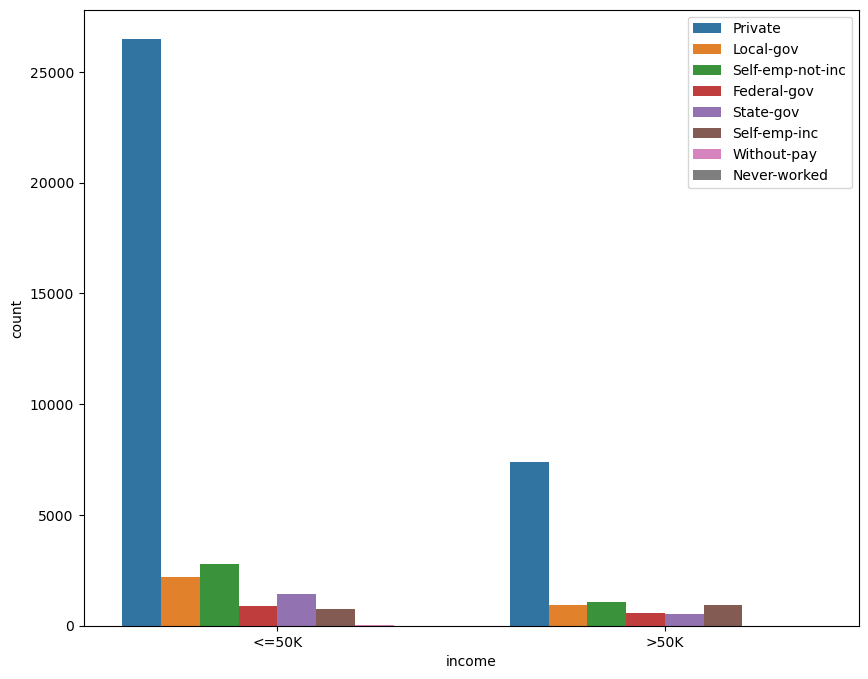

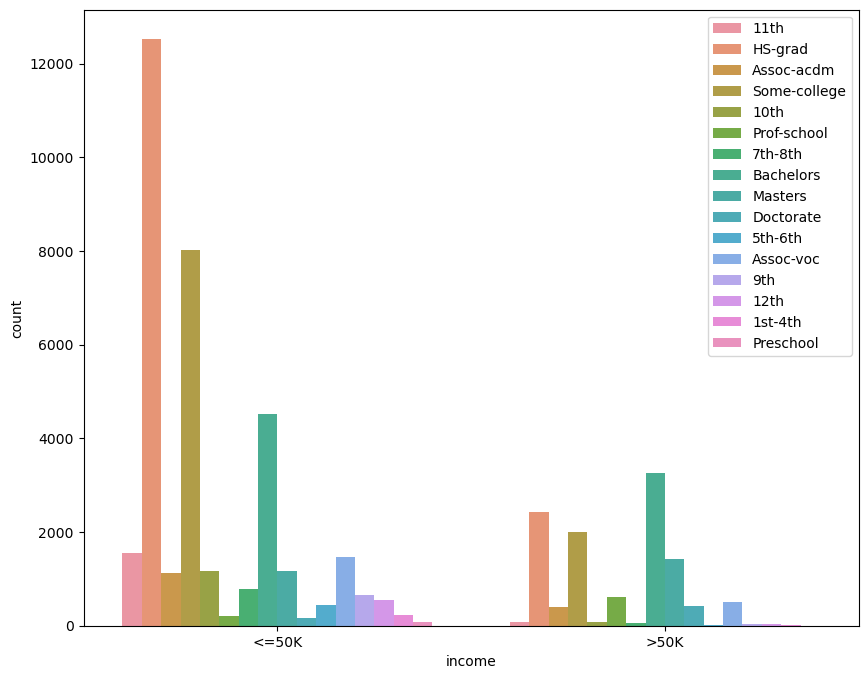

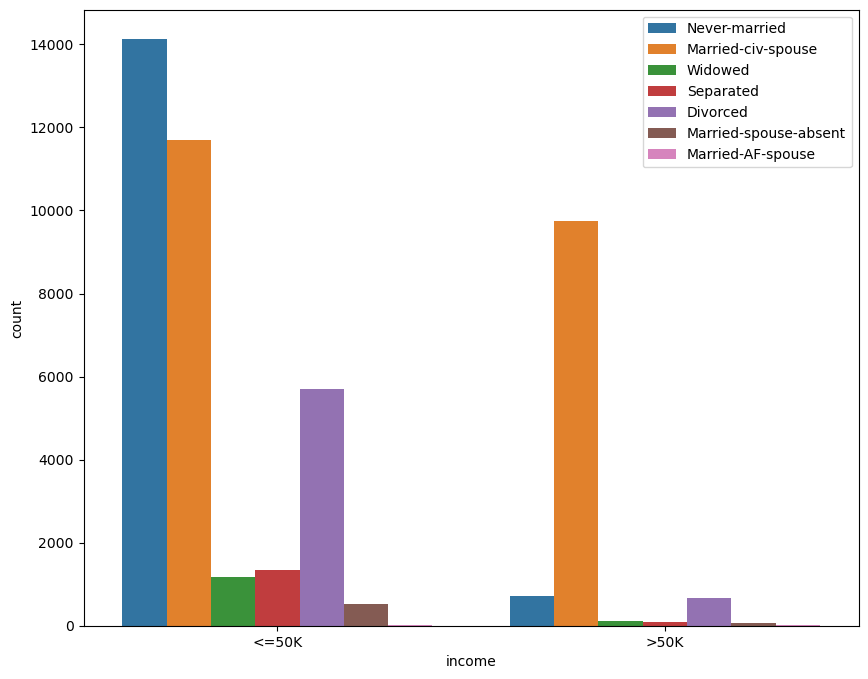

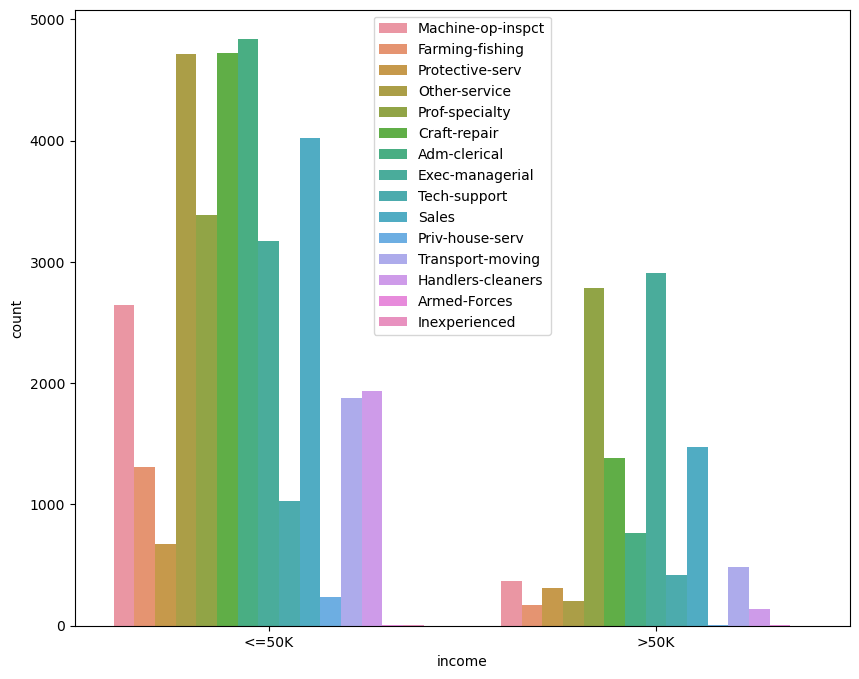

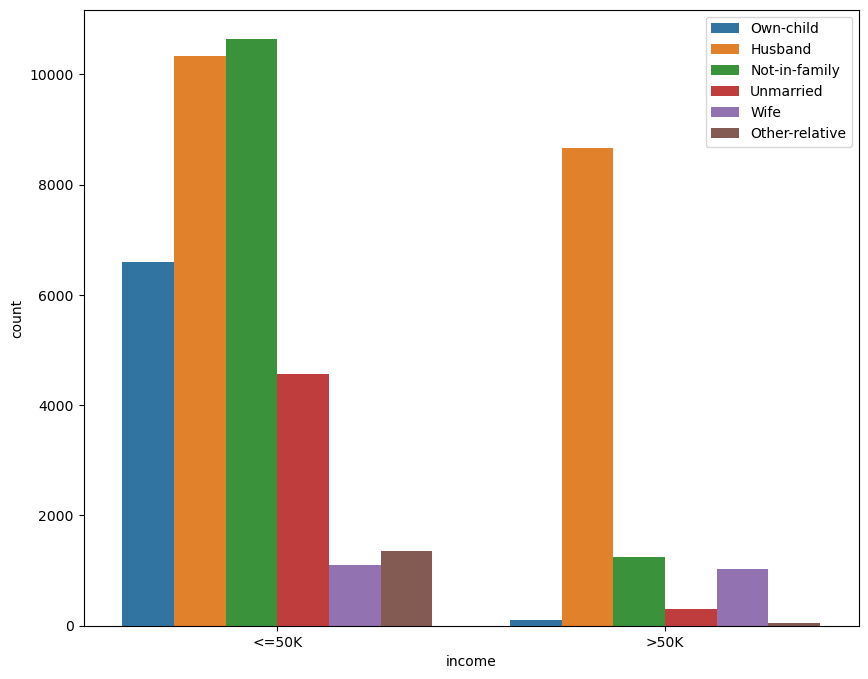

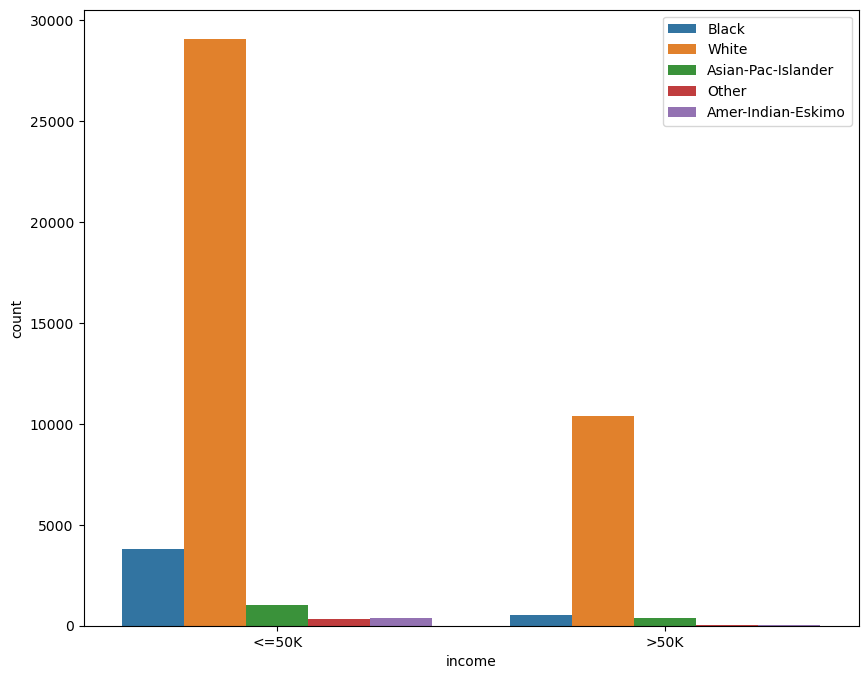

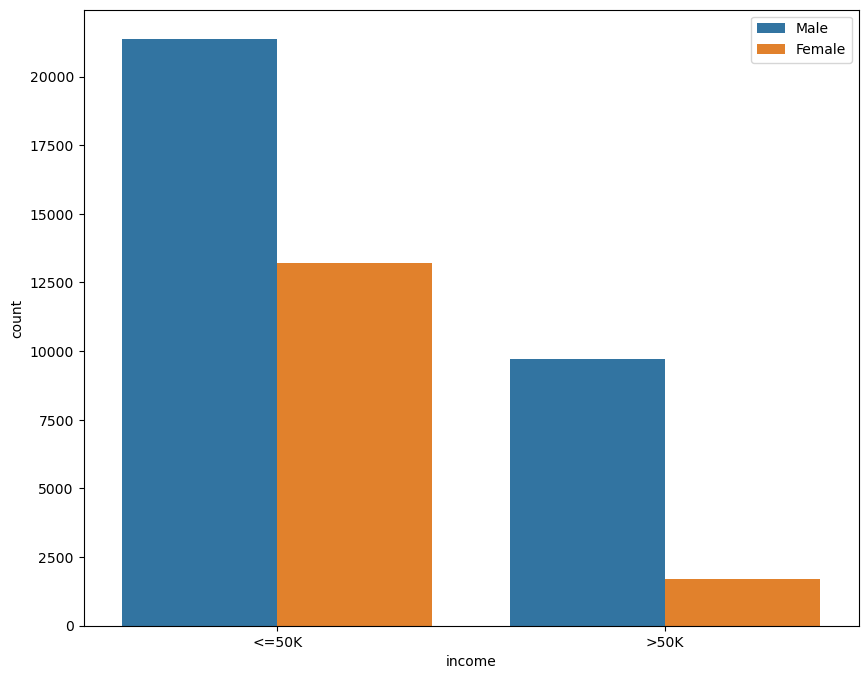

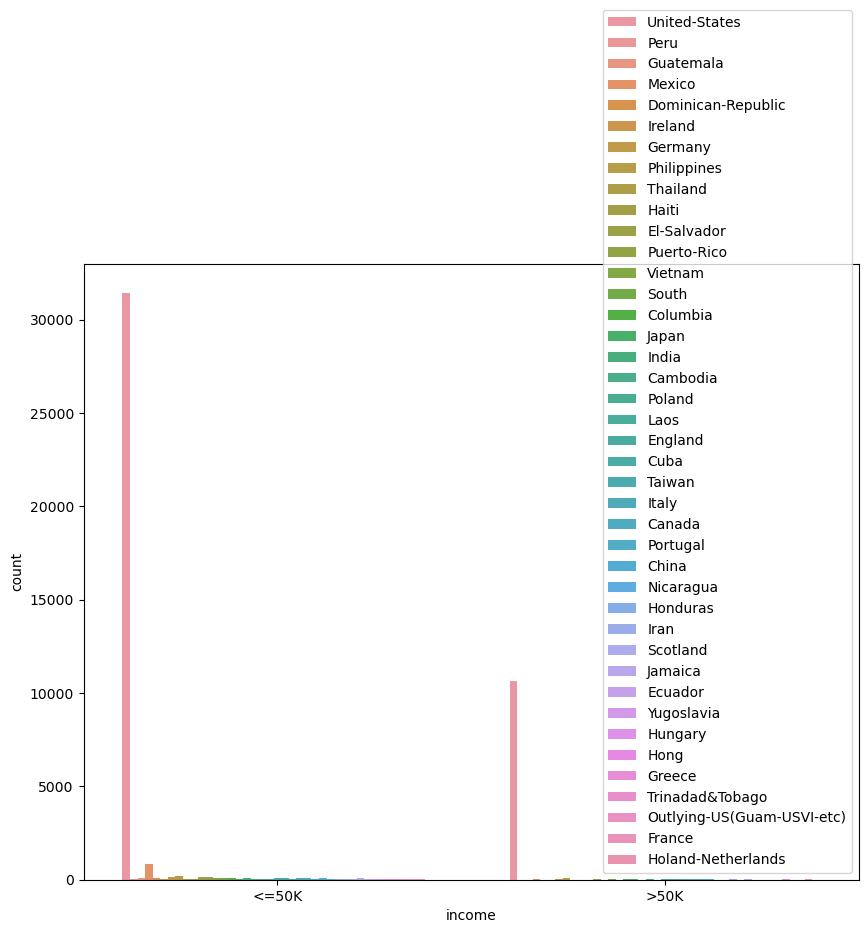

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [21]:
cols = []
for i in df.columns:
    if (df[i].dtype == 'O') & (i != "income"):
        cols.append(i)
    
for i in cols:
    plt.figure(figsize=(10,8))
    sns.countplot(x=df['income'], hue=df[i])
    plt.legend(loc="best")
    plt.show()

print(cols)

<h2 style="font-family: Times New Roman">Distribution of Numeric Columns</h2>

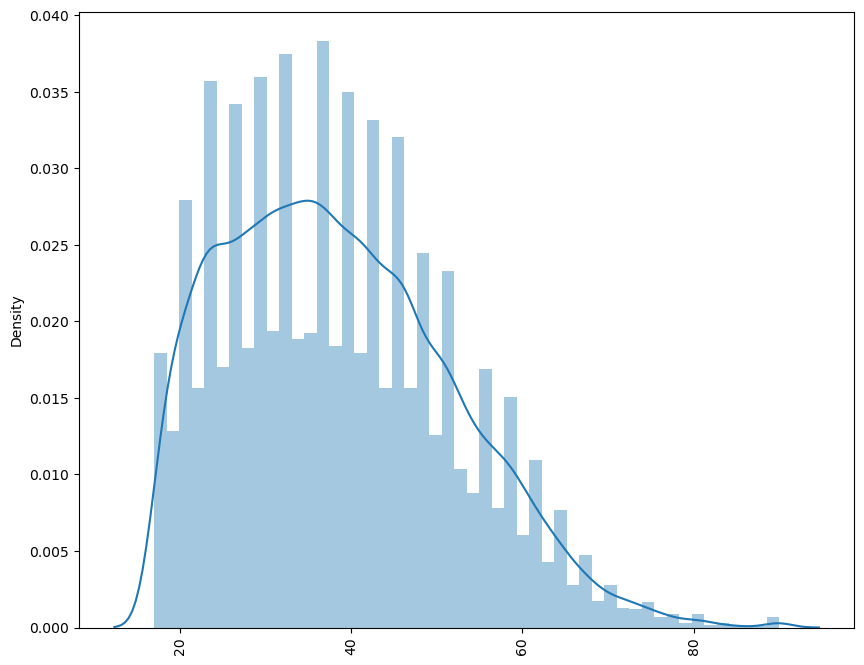

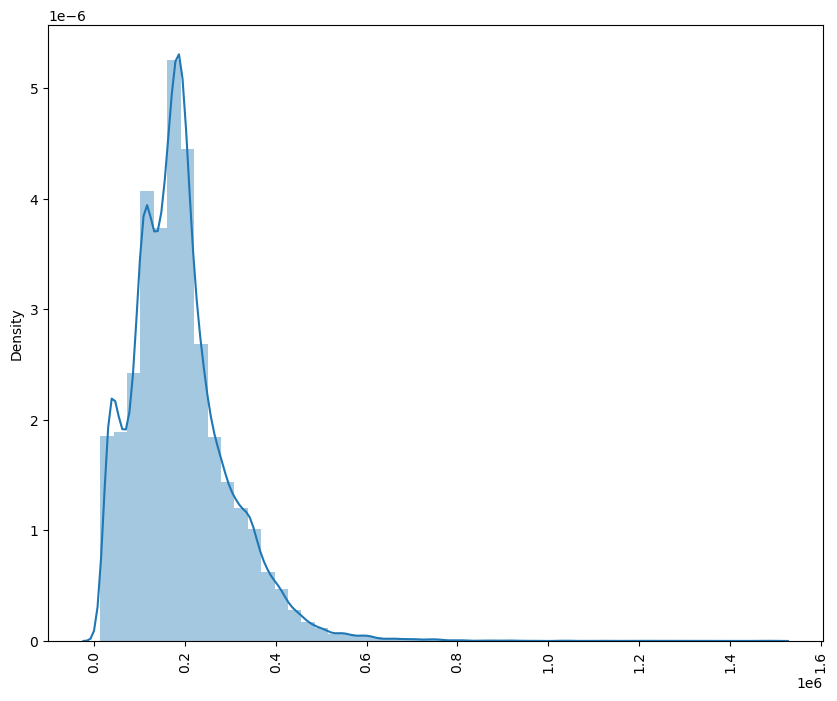

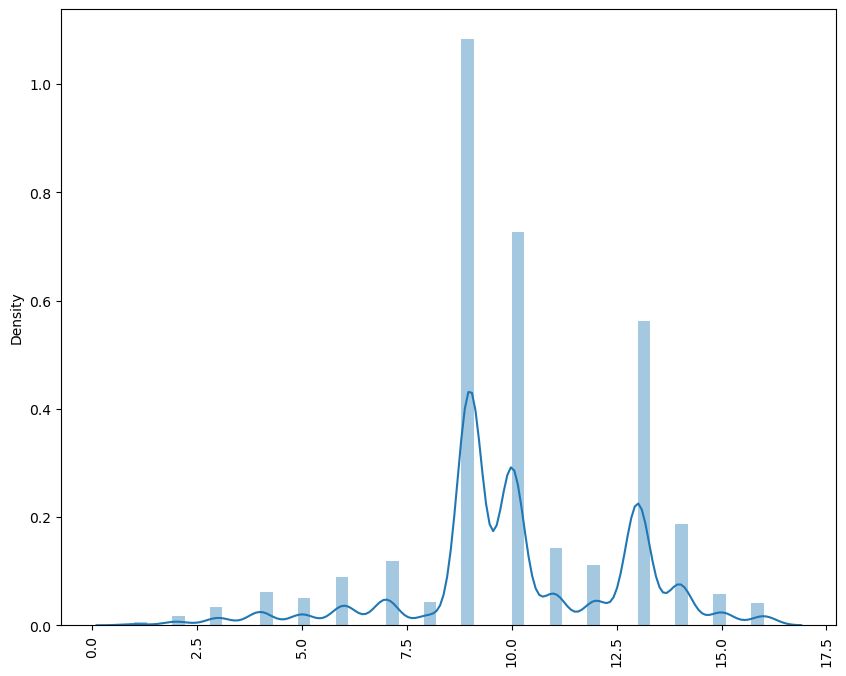

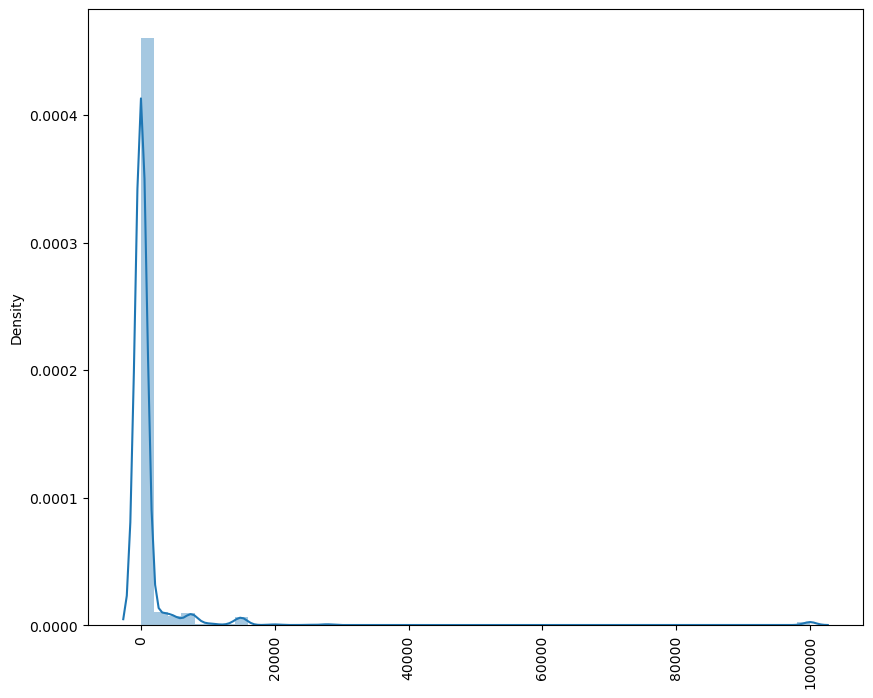

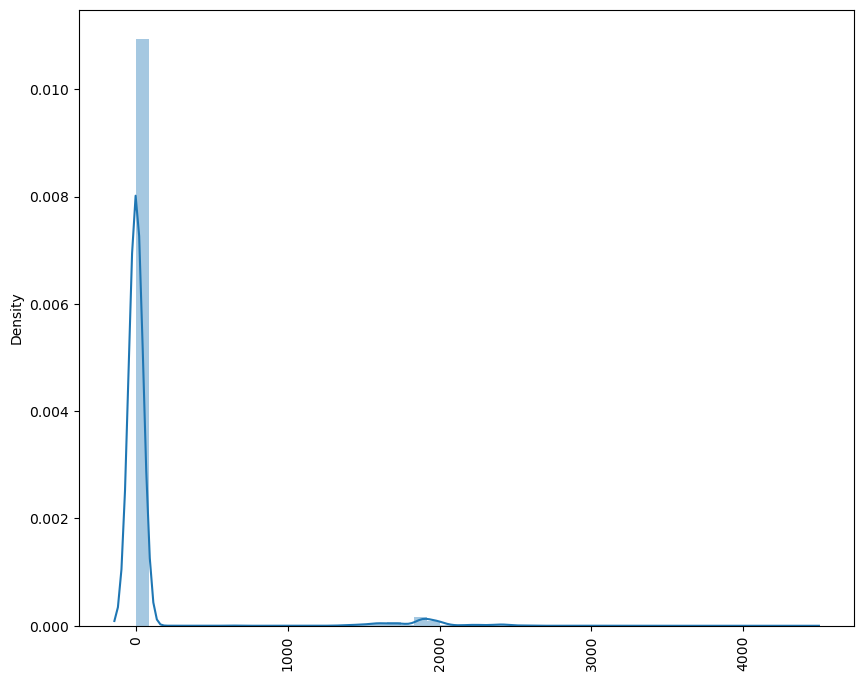

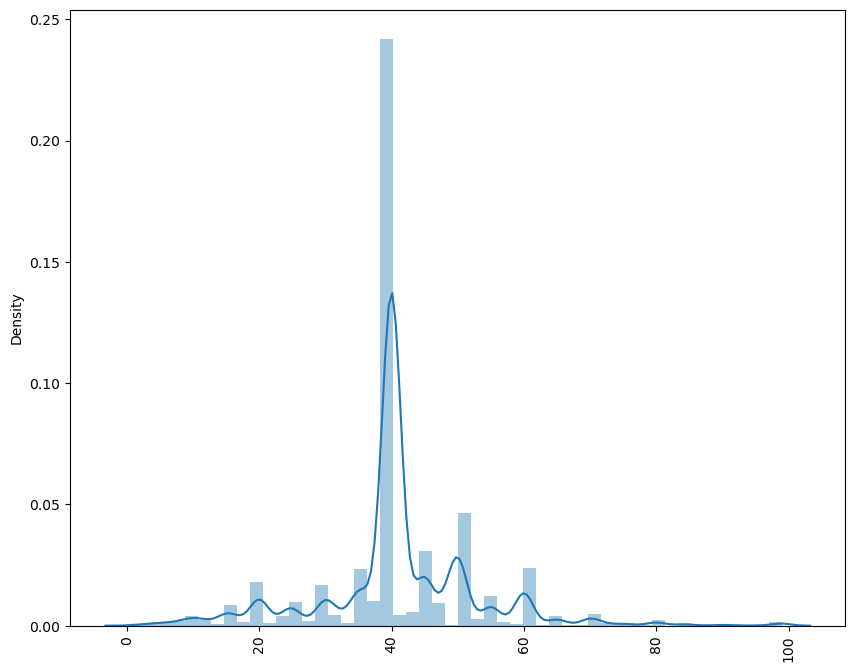

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [22]:
cols = []
for i in df.columns:
    if (df[i].dtype == 'int64'):
        cols.append(i)
    
for i in cols:
    plt.figure(figsize=(10,8))
    sns.distplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

print(cols)

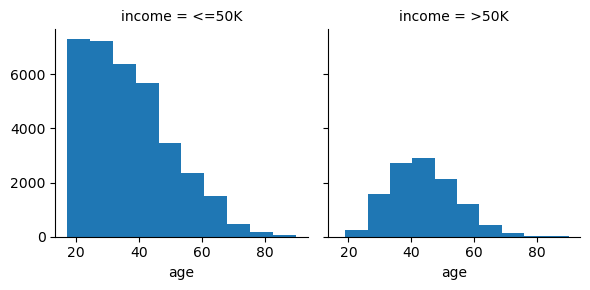

In [23]:
g = sns.FacetGrid(df, col='income')
g.map(plt.hist, 'age')

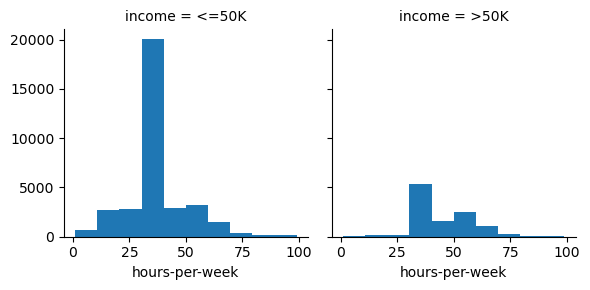

In [24]:
g = sns.FacetGrid(df, col='income')
g.map(plt.hist, 'hours-per-week')

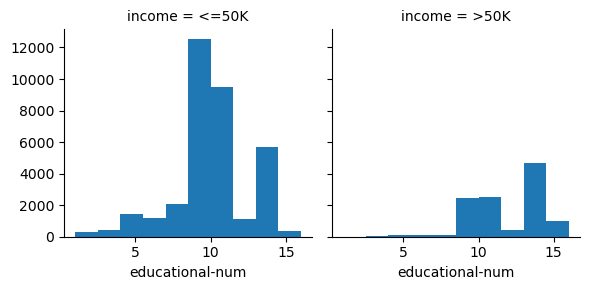

In [25]:
g = sns.FacetGrid(df, col='income')
g.map(plt.hist, 'educational-num')

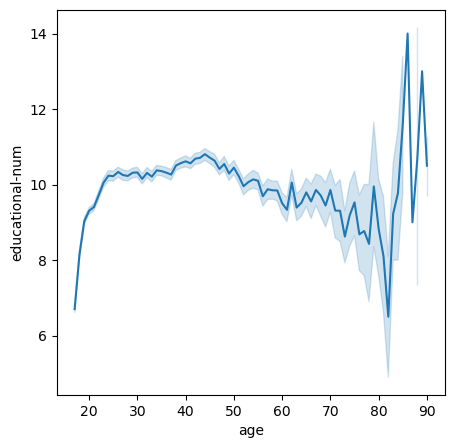

In [26]:
plt.figure(figsize = (5,5))
sns.lineplot(x=df['age'], y=df['educational-num'])
plt.show()

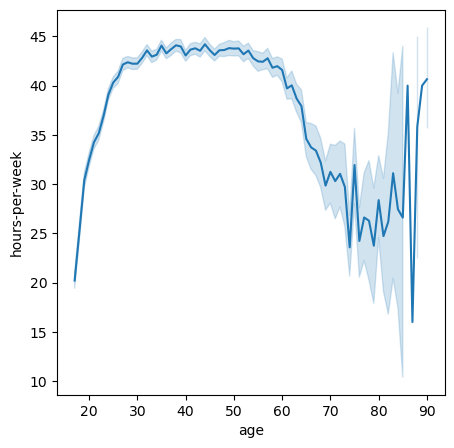

In [27]:
plt.figure(figsize = (5,5))
sns.lineplot(x=df['age'], y=df['hours-per-week'])
plt.show()

In [28]:
gc = pd.DataFrame(df.groupby(["workclass", "income"]).size().reset_index(name='Counts'))
gc

,workclass,income,Counts
0,Federal-gov,<=50K,871
1,Federal-gov,>50K,561
2,Local-gov,<=50K,2209
3,Local-gov,>50K,927
4,Never-worked,<=50K,10
5,Private,<=50K,26479
6,Private,>50K,7381
7,Self-emp-inc,<=50K,756
8,Self-emp-inc,>50K,938
9,Self-emp-not-inc,<=50K,2784


# Feature Transformation

***Assigning new values as a new category for different values in different columns.***

**workclass**

In [29]:
df['workclass'] = df['workclass'].replace(["Local-gov", "State-gov", "Federal-gov"], "Govt_Emp")
df['workclass'] = df['workclass'].replace(["Without-pay", "Never-worked"], "Not_Earning")
df['workclass'] = df['workclass'].replace(["Self-emp-not-inc", "Self-emp-inc"], "Self_Emp")

**education**

In [30]:
df['education'] = df['education'].replace(["9th", "10th", "11th", "12th", "HS-grad"], "HS_Grad")
df['education'] = df['education'].replace(["Some-college", "Assoc-voc", "Assoc-acdm"], "Some_College")
df['education'] = df['education'].replace(["Some-college", "Assoc-voc", "Assoc-acdm"], "Some_College")
df['education'] = df['education'].replace(["Masters", "Prof-school"], "Masters")
df['education'] = df['education'].replace(["Preschool", "1st-4th"], "Junior_School")
df['education'] = df['education'].replace(["5th-6th", "7th-8th"], "Secondary_School")

**relationship**

In [31]:
df['relationship'] = df['relationship'].replace(["Wife", "Husband"], "Spouse")

**race**


In [32]:
df['race'] = df['race'].replace(["Asian-Pac-Islander", "mer-Indian-Eskimo", "Other"], "Other")

**native-country**
*category for less than 100*

In [33]:
country = pd.DataFrame(df['native-country'].value_counts())
country.reset_index(inplace = True)
other_countries = []
other_countries.append(country[country['count'] < 100]["native-country"].values)
other_countries

[array(['Dominican-Republic', 'Japan', 'Guatemala', 'Vietnam', 'Columbia',
        'Poland', 'Haiti', 'Portugal', 'Iran', 'Taiwan', 'Greece',
        'Nicaragua', 'Peru', 'Ecuador', 'France', 'Ireland', 'Thailand',
        'Hong', 'Cambodia', 'Trinadad&Tobago', 'Yugoslavia',
        'Outlying-US(Guam-USVI-etc)', 'Laos', 'Scotland', 'Honduras',
        'Hungary', 'Holand-Netherlands'], dtype=object)]

In [34]:
df['native-country'] = df['native-country'].replace(['Dominican-Republic', 'Japan', 'Guatemala', 'Vietnam', 'Columbia',
        'Poland', 'Haiti', 'Portugal', 'Iran', 'Taiwan', 'Greece',
        'Nicaragua', 'Peru', 'Ecuador', 'France', 'Ireland', 'Thailand',
        'Hong', 'Cambodia', 'Trinadad&Tobago', 'Yugoslavia',
        'Outlying-US(Guam-USVI-etc)', 'Laos', 'Scotland', 'Honduras',
        'Hungary', 'Holand-Netherlands'], "Others")

***Checking for new assigned values***

In [35]:
def value_count_of_each_col(df):
    cols = df.columns
    for i in cols:
        print(df[i].value_counts())
        print("-----------------------------------------")
        
value_count_of_each_col(df)

age
36    1312
31    1299
33    1299
35    1293
34    1267
      ... 
88       6
85       5
89       1
87       1
86       1
Name: count, Length: 74, dtype: int64
-----------------------------------------
workclass
Private        33860
Govt_Emp        6549
Self_Emp        5555
Not_Earning       31
Name: count, dtype: int64
-----------------------------------------
fnlwgt
203488    21
120277    19
126569    18
125892    18
126675    17
          ..
132606     1
199765     1
46857      1
89392      1
257302     1
Name: count, Length: 27039, dtype: int64
-----------------------------------------
education
HS_Grad             19119
Some_College        13532
Bachelors            7761
Masters              3399
Secondary_School     1310
Doctorate             576
Junior_School         298
Name: count, dtype: int64
-----------------------------------------
educational-num
9     14960
10    10026
13     7761
14     2589
11     1977
7      1634
12     1529
6      1241
4       844
15      810
5   

# Data Preparation 

## Encoding Categorical Features

***Encoding the Categorical Columns in dataset helps converting categorical(non-numeric) data into numeric data because ML algos require numeric data to perform calculations.***

In [36]:
df1 = df

In [37]:
df1.drop(columns=(["educational-num","fnlwgt"]), inplace = True)

In [38]:
df1.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,HS_Grad,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS_Grad,Married-civ-spouse,Farming-fishing,Spouse,White,Male,0,0,50,United-States,<=50K
2,28,Govt_Emp,Some_College,Married-civ-spouse,Protective-serv,Spouse,White,Male,0,0,40,United-States,>50K
3,44,Private,Some_College,Married-civ-spouse,Machine-op-inspct,Spouse,Black,Male,7688,0,40,United-States,>50K
5,34,Private,HS_Grad,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**Encoding features using Column Transformer**

In [39]:
transformer = ColumnTransformer(transformers=[("tnf1", OneHotEncoder(sparse=False, drop="first", dtype="int32")
                                               ,["workclass","marital-status","occupation","relationship","race","gender","native-country"])
                                              ,("tnf2", OrdinalEncoder(
                                                  categories=[["Junior_School","Secondary_School","HS_Grad","Some_College","Bachelors","Masters","Doctorate"]])
                                              ,["education"])
                                           ], remainder="passthrough")

In [40]:
transformed_array = transformer.fit_transform(df1)

**Encoding Target Variable**

In [41]:
le = LabelEncoder()
target = le.fit_transform(df['income'])

In [42]:
transformed_df1 = pd.DataFrame(transformed_array)

# X,y Split

***Splitting the data into Train and Test chunks.***

In [43]:
X = transformed_df1.iloc[:,:-1].astype("int32")
y = target

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Data Standardization

***Standardizing the columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.***

In [44]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Model Training (Phase -1)

In [45]:
models_ph1 = pd.DataFrame(columns=["Model","Accuracy Score"])

### Logistic Regression 

In [46]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
score = accuracy_score(y_test, y_pred)
log_reg_accuracy_score_cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')
print("LogisticRegression Accuracy Score: ", score)
print("LogisticRegression Cross Val Score: ", log_reg_accuracy_score_cv.mean())

new_row = {"Model": "LogisticRegression", "Accuracy Score": log_reg_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

LogisticRegression Accuracy Score:  0.8419393412327427
LogisticRegression Cross Val Score:  0.8345690792894486


### Decision Trees 

In [47]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
score = accuracy_score(y_test, y_pred)
dt_accuracy_score_cv = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print("DecisionTreeClassifier Accuracy Score: ", score)
print("DecisionTreeClassifier Cross Val Score: ", dt_accuracy_score_cv.mean())

new_row = {"Model": "DecisionTreeClassifier", "Accuracy Score": dt_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

DecisionTreeClassifier Accuracy Score:  0.8156321339276008
DecisionTreeClassifier Cross Val Score:  0.8192199343902737


### Random Forest

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score = accuracy_score(y_test, y_pred)
rf_accuracy_score_cv = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print("RandomForestClassifier Accuracy Score: ", score)
print("RandomForestClassifier Cross Val Score: ", rf_accuracy_score_cv.mean())

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": rf_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

RandomForestClassifier Accuracy Score:  0.8431351233829764
RandomForestClassifier Cross Val Score:  0.8411785926997363


### Support Vector Classifier

In [49]:
svm = SVC(random_state=0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
score = accuracy_score(y_test, y_pred)
svm_accuracy_score_cv = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print("SVC Accuracy Score: ", score)
print("SVC Cross Val Score: ", svm_accuracy_score_cv.mean())

new_row = {"Model": "SVC", "Accuracy Score": svm_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

SVC Accuracy Score:  0.8430264159147733
SVC Cross Val Score:  0.7962388090038477


### XGBClassifier

In [50]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
score = accuracy_score(y_test, y_pred)
xgb_reg_accuracy_score_cv = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
print("XGBClassifier Accuracy Score: ", score)
print("XGBClassifier Cross Val Score: ", xgb_reg_accuracy_score_cv.mean())

new_row = {"Model": "XGBClassifier", "Accuracy Score": xgb_reg_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

XGBClassifier Accuracy Score:  0.8647679095553864
XGBClassifier Cross Val Score:  0.8678553702600755


### BernoulliNB

In [51]:
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
predictions = BNB.predict(x_test)
y_pred = accuracy_score(y_test, y_pred)
BNB_accuracy_score_cv = cross_val_score(BNB, X, y, cv=10, scoring='accuracy')
print("BernoulliNB Accuracy Score: ", score)
print("BernoulliNB Cross Val Score: ", BNB_accuracy_score_cv.mean())

new_row = {"Model": "BernoulliNB", "Accuracy Score": BNB_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

BernoulliNB Accuracy Score:  0.8647679095553864
BernoulliNB Cross Val Score:  0.7506034204033012


### GuassianNB

In [52]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
score = accuracy_score(y_test, y_pred)
GNB_accuracy_score_cv = cross_val_score(GNB, X, y, cv=10, scoring='accuracy')
print("GaussianNB Accuracy Score: ", score)
print("GaussianNB Cross Val Score: ", GNB_accuracy_score_cv.mean())

new_row = {"Model": "GaussianNB", "Accuracy Score": GNB_accuracy_score_cv.mean()}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

GaussianNB Accuracy Score:  0.6155016849657572
GaussianNB Cross Val Score:  0.7982827032341624


### KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_test, y_pred)
knn_accuracy_score_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("KNeighborsClassifier Accuracy Score: ", score)

KNeighborsClassifier Accuracy Score:  0.8253070985976737


***Optimizing the KNN Model***

In [54]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    y_pred = knn2.predict(x_test)
    score_list.append(accuracy_score(y_test, y_pred))


Text(0, 0.5, 'Score')

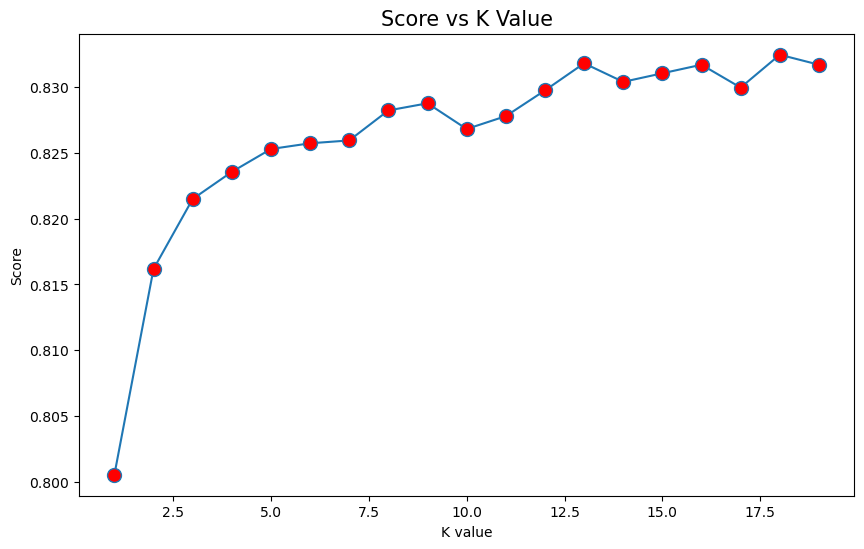

In [55]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

In [56]:
knn3 = KNeighborsClassifier(n_neighbors=18)
knn3.fit(x_train, y_train)
y_pred = knn3.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("KNeighborsClassifier Accuracy Score: ", score)

new_row = {"Model": "KNeighborsClassifier", "Accuracy Score": score}
models_ph1 = models_ph1._append(new_row, ignore_index=True)

KNeighborsClassifier Accuracy Score:  0.832481791499076


# Comparison of Models (Phase-1)

In [57]:
models_ph1.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
4,XGBClassifier,0.867855
2,RandomForestClassifier,0.841179
0,LogisticRegression,0.834569
7,KNeighborsClassifier,0.832482
1,DecisionTreeClassifier,0.819220
6,GaussianNB,0.798283
3,SVC,0.796239
5,BernoulliNB,0.750603


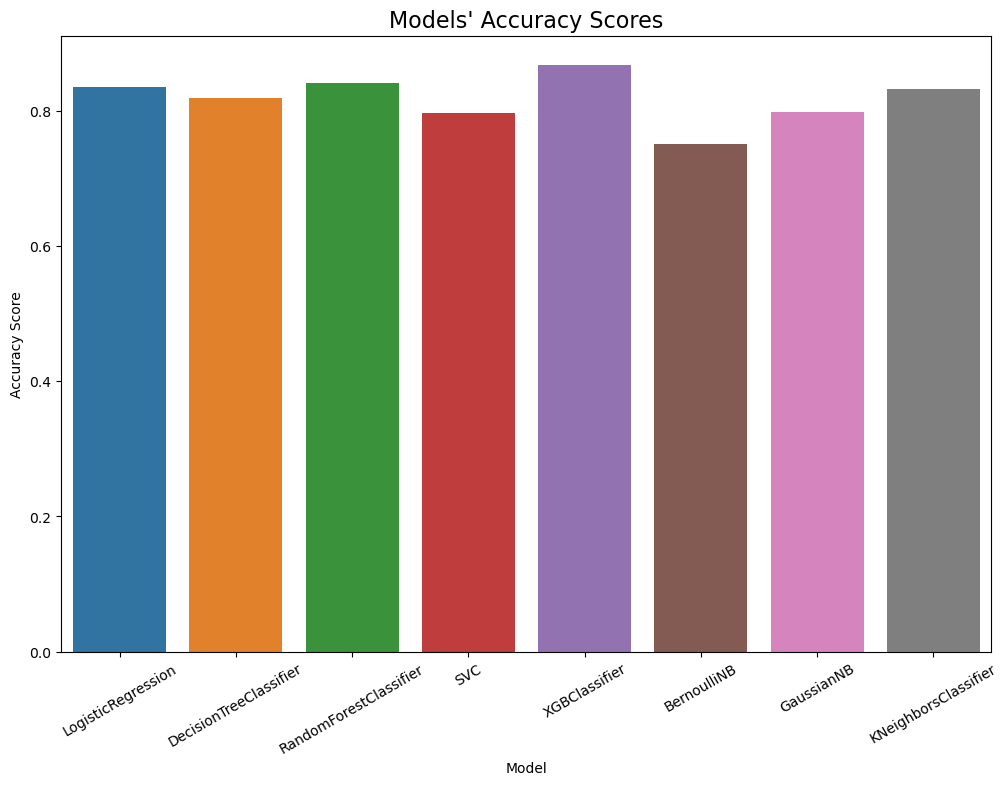

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_ph1["Model"], y=models_ph1["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=16)
plt.xticks(rotation=30)
plt.show()

# Model Training (Phase-2)

### Converting distribution of features to a normal distribution by using function transformer

***As observed above, features have a right skewed distribution***
***By applying log transformation, we can have normal distribution of the features and check if the accuracy impoves or not***

### Plotting distplot and QQ plot to observe the distribution of different features

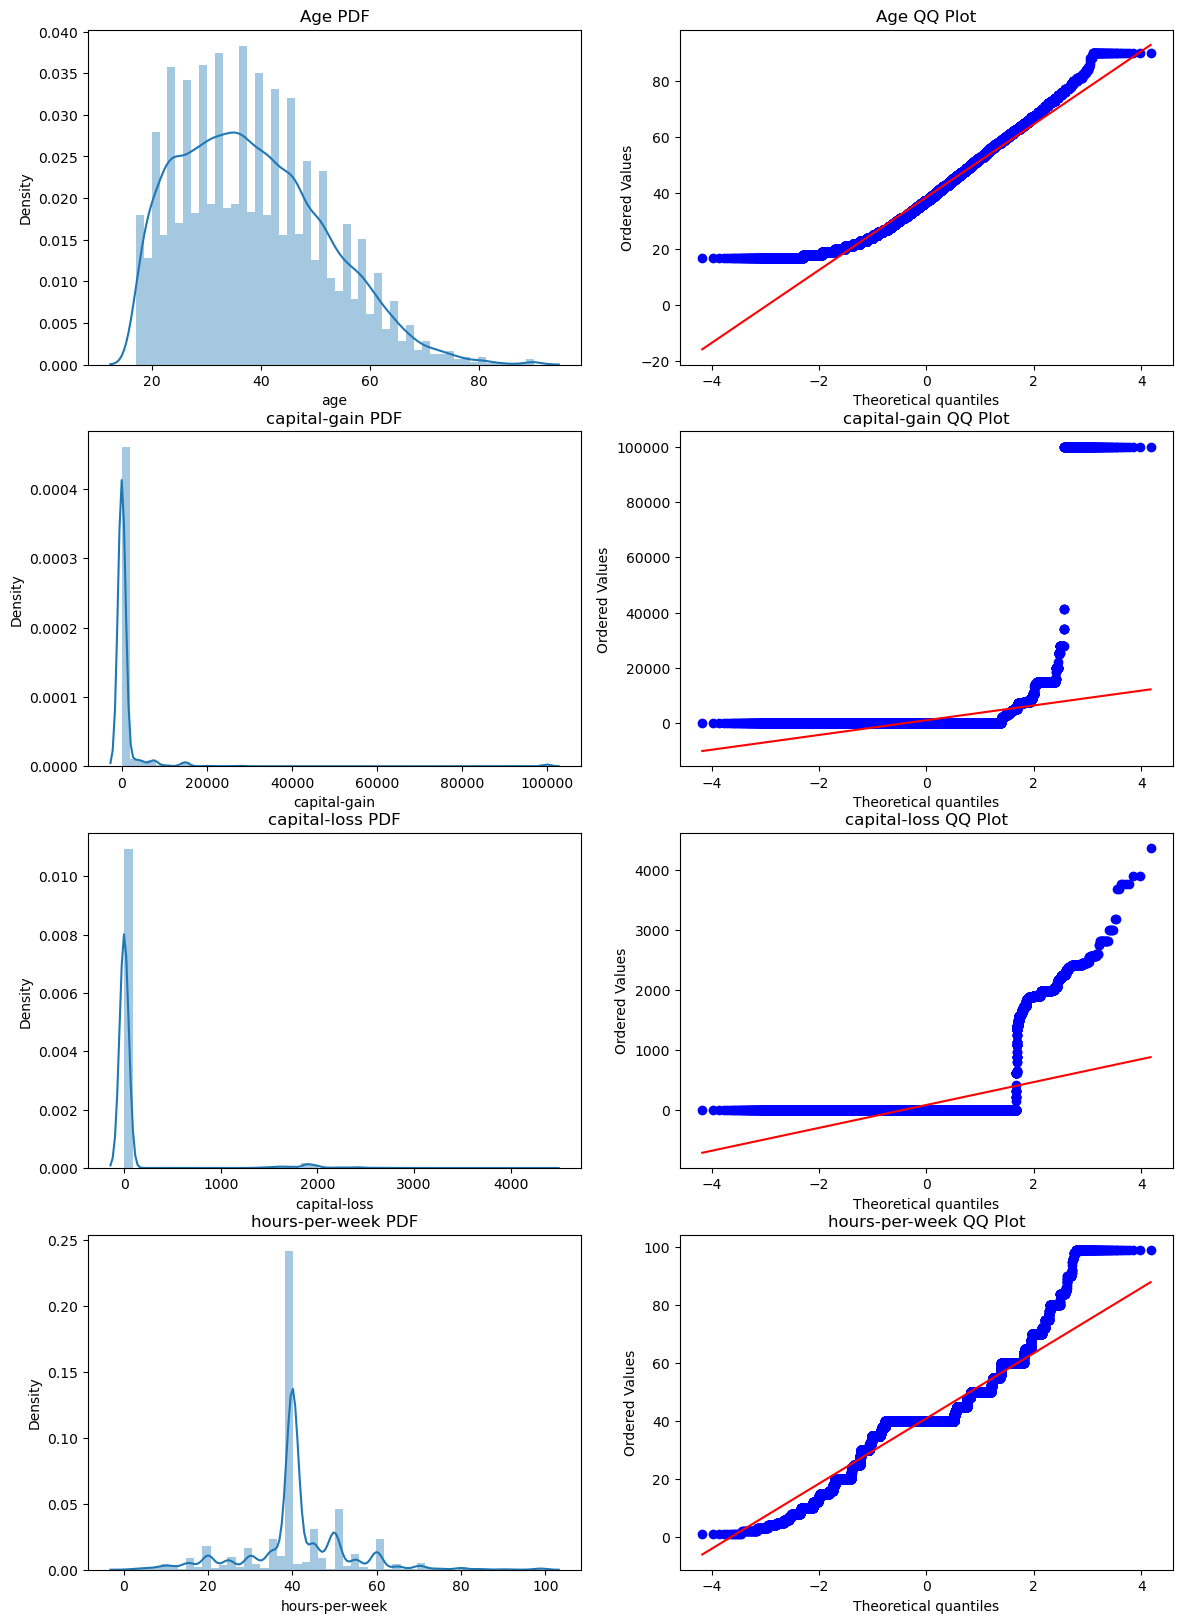

In [59]:
plt.figure(figsize = (14,20))
plt.subplot(421)
sns.distplot(df["age"])
plt.title("Age PDF")

plt.subplot(422)
stats.probplot(df["age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")


plt.subplot(423)
sns.distplot(df["capital-gain"])
plt.title("capital-gain PDF")

plt.subplot(424)
stats.probplot(df["capital-gain"], dist="norm", plot=plt)
plt.title("capital-gain QQ Plot")


plt.subplot(425)
sns.distplot(df["capital-loss"])
plt.title("capital-loss PDF")

plt.subplot(426)
stats.probplot(df["capital-loss"], dist="norm", plot=plt)
plt.title("capital-loss QQ Plot")


plt.subplot(427)
sns.distplot(df["hours-per-week"])
plt.title("hours-per-week PDF")

plt.subplot(428)
stats.probplot(df["hours-per-week"], dist="norm", plot=plt)
plt.title("hours-per-week QQ Plot")


plt.show()

# Data Preparation
***repeating same steps***

In [60]:
dist_df = df1

## Using Function Transformer 
***applying log function on numeric columns***

In [61]:
trf = FunctionTransformer(func=np.log1p)

col_transformer = ColumnTransformer(transformers=[("tnf1", OneHotEncoder(sparse=False, drop="first", dtype="int32")
                                               ,["workclass","marital-status","occupation","relationship","race","gender","native-country"])
                                              ,("tnf2", OrdinalEncoder(
                                                  categories=[["Junior_School","Secondary_School","HS_Grad","Some_College","Bachelors","Masters","Doctorate"]])
                                              ,["education"])
                                                  ,("col_trf",trf,['age', 'capital-gain', 'capital-loss', 'capital-gain', 'hours-per-week'])
                                                  ],remainder="passthrough")

transformed_dist_df1 = pd.DataFrame(col_transformer.fit_transform(dist_df))

In [62]:
le = LabelEncoder()
target = le.fit_transform(df['income'])

In [63]:
X2 = transformed_dist_df1.iloc[:,:-1].astype('int32')
y2 = target

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state=42)

In [64]:
ss = StandardScaler()
x_train2 = ss.fit_transform(x_train2)
x_test2 = ss.transform(x_test2)

# Model Training (Phase-2)

In [65]:
models_ph2 = pd.DataFrame(columns=["Model","Accuracy Score"])

### Logistic Regression 

In [66]:
log_reg_ph2 = LogisticRegression()
log_reg_ph2.fit(x_train2, y_train2)
y_pred = log_reg_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
log_reg_ph2_accuracy_score_cv = cross_val_score(log_reg_ph2, X2, y2, cv=10, scoring='accuracy')
print("LogisticRegression Accuracy Score: ", score)
print("LogisticRegression Cross Val Score: ", log_reg_ph2_accuracy_score_cv.mean())

new_row = {"Model": "LogisticRegression", "Accuracy Score": log_reg_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

LogisticRegression Accuracy Score:  0.8319382541580607
LogisticRegression Cross Val Score:  0.837025832647929


### Decision Trees

In [67]:
dt_ph2 = DecisionTreeClassifier()
dt_ph2.fit(x_train2, y_train2)
y_pred = dt_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
dt_ph2_accuracy_score_cv = cross_val_score(dt_ph2, X2, y2, cv=10, scoring='accuracy')
print("DecisionTreeClassifier Accuracy Score: ", score)
print("DecisionTreeClassifier Cross Val Score: ", dt_ph2_accuracy_score_cv.mean())

new_row = {"Model": "DecisionTreeClassifier", "Accuracy Score": dt_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

DecisionTreeClassifier Accuracy Score:  0.8243287313838461
DecisionTreeClassifier Cross Val Score:  0.8276335309188196


### Random Forest

In [68]:
rf_ph2 = RandomForestClassifier()
rf_ph2.fit(x_train2, y_train2)
y_pred = rf_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
rf_ph2_accuracy_score_cv = cross_val_score(rf_ph2, X2, y2, cv=10, scoring='accuracy')
print("RandomForestClassifier Accuracy Score: ", score)
print("RandomForestClassifier Cross Val Score: ", rf_ph2_accuracy_score_cv.mean())

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": rf_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

RandomForestClassifier Accuracy Score:  0.8329166213718883
RandomForestClassifier Cross Val Score:  0.8349821511292624


### Support Vector Classifier

In [69]:
svm_ph2 = SVC(random_state=0)
svm_ph2.fit(x_train2, y_train2)
y_pred = svm_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
svm_ph2_accuracy_score_cv = cross_val_score(svm_ph2, X2, y2, cv=10, scoring='accuracy')
print("SVC Accuracy Score: ", score)
print("SVC Cross Val Score: ", svm_ph2_accuracy_score_cv.mean())

new_row = {"Model": "SVC", "Accuracy Score": svm_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

SVC Accuracy Score:  0.8344385259267312
SVC Cross Val Score:  0.8428525766470972


### XGBClassifier

In [70]:
xgb_ph2 = XGBClassifier()
xgb_ph2.fit(x_train2, y_train2)
y_pred = xgb_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
xgb_ph2_reg_accuracy_score_cv = cross_val_score(xgb_ph2, X2, y2, cv=10, scoring='accuracy')
print("XGBClassifier Accuracy Score: ", score)
print("XGBClassifier Cross Val Score: ", xgb_ph2_reg_accuracy_score_cv.mean())

new_row = {"Model": "XGBClassifier", "Accuracy Score": xgb_ph2_reg_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

XGBClassifier Accuracy Score:  0.8446570279378194
XGBClassifier Cross Val Score:  0.8454399538652069


### BernoulliNB

In [71]:
BNB_ph2 = BernoulliNB()
BNB_ph2.fit(x_train2, y_train2)
predictions = BNB_ph2.predict(x_test2)
y_pred = accuracy_score(y_test2, y_pred)
BNB_ph2_accuracy_score_cv = cross_val_score(BNB_ph2, X2, y2, cv=10, scoring='accuracy')
print("BernoulliNB Accuracy Score: ", score)
print("BernoulliNB Cross Val Score: ", BNB_ph2_accuracy_score_cv.mean())

new_row = {"Model": "BernoulliNB", "Accuracy Score": BNB_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

BernoulliNB Accuracy Score:  0.8446570279378194
BernoulliNB Cross Val Score:  0.7530383400928369


### GuassianNB

In [72]:
GNB_ph2 = GaussianNB()
GNB_ph2.fit(x_train2, y_train2)
y_pred = GNB_ph2.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
GNB_ph2_accuracy_score_cv = cross_val_score(GNB_ph2, X2, y2, cv=10, scoring='accuracy')
print("GaussianNB Accuracy Score: ", score)
print("GaussianNB Cross Val Score: ", GNB_ph2_accuracy_score_cv.mean())

new_row = {"Model": "GaussianNB", "Accuracy Score": GNB_ph2_accuracy_score_cv.mean()}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

GaussianNB Accuracy Score:  0.605391890422872
GaussianNB Cross Val Score:  0.6532670334760865


### KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train2, y_train2)
y_pred = knn.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
print("KNeighborsClassifier Accuracy Score: ", score)

KNeighborsClassifier Accuracy Score:  0.8228068268290032


***Optimizing the KNN Model***

In [74]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train2, y_train2)
    y_pred = knn2.predict(x_test2)
    score_list.append(accuracy_score(y_test2, y_pred))

Text(0, 0.5, 'Score')

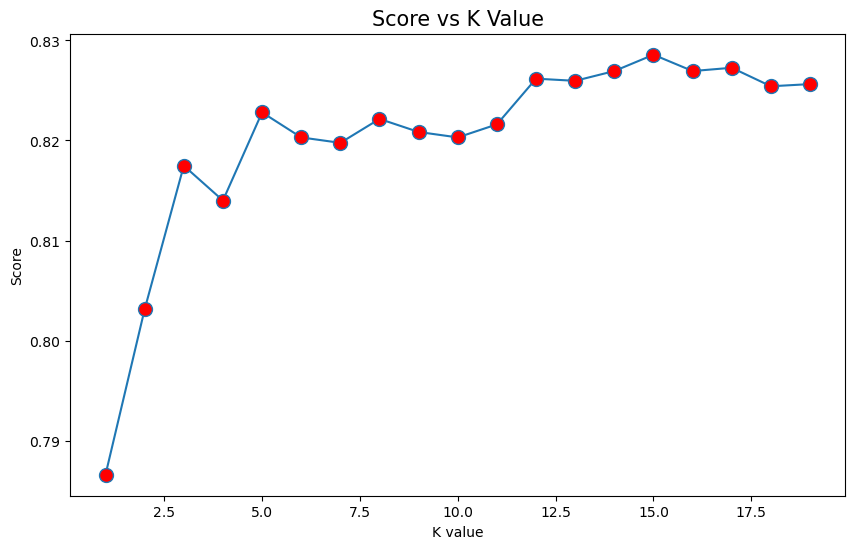

In [75]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

In [76]:
knn3 = KNeighborsClassifier(n_neighbors=15)
knn3.fit(x_train2, y_train2)
y_pred = knn3.predict(x_test2)
score = accuracy_score(y_test2, y_pred)
print("KNeighborsClassifier Accuracy Score: ", score)

new_row = {"Model": "KNeighborsClassifier", "Accuracy Score": score}
models_ph2 = models_ph2._append(new_row, ignore_index=True)

KNeighborsClassifier Accuracy Score:  0.8285683226437657


# Comparison of Models (Phase-2)

In [77]:
models_ph2.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
4,XGBClassifier,0.845440
3,SVC,0.842853
0,LogisticRegression,0.837026
2,RandomForestClassifier,0.834982
7,KNeighborsClassifier,0.828568
1,DecisionTreeClassifier,0.827634
5,BernoulliNB,0.753038
6,GaussianNB,0.653267


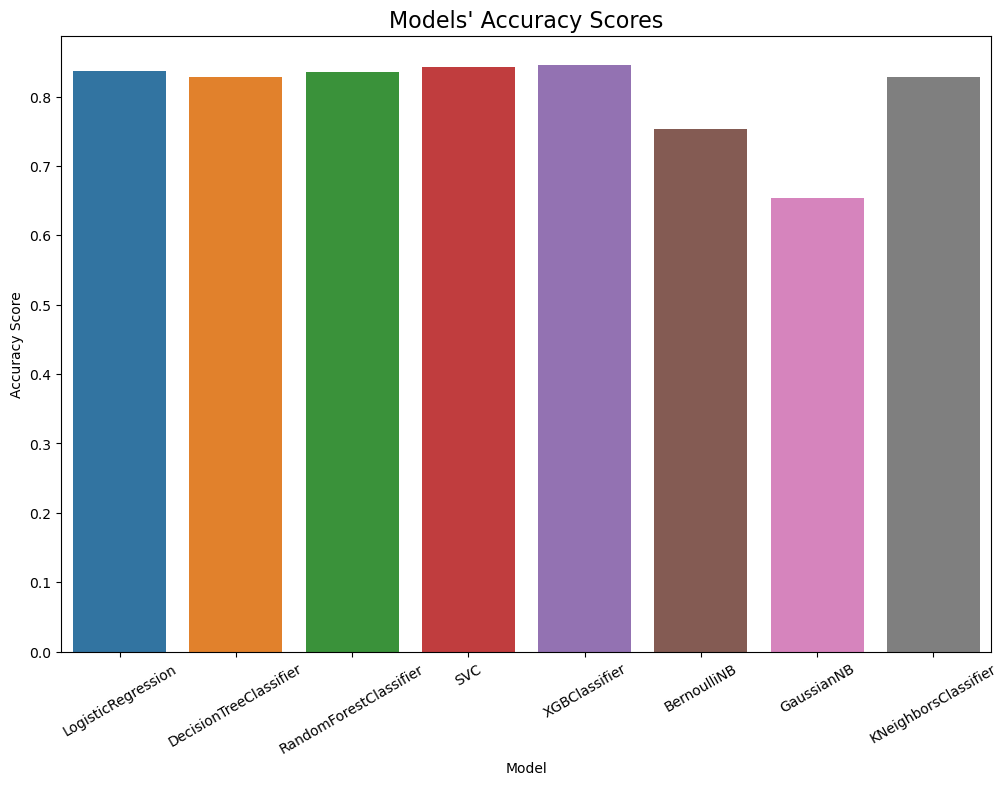

In [78]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_ph2["Model"], y=models_ph2["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=16)
plt.xticks(rotation=30)
plt.show()

### Comparing the Results of Phase-1 and Phase-2 of Logistic Regression (Linear Model)

In [79]:
print("Accuracy of logistic regression (PHASE-1): ", (log_reg_accuracy_score_cv.mean())*100)
print("Accuracy of logistic regression (PHASE-2): ", (log_reg_ph2_accuracy_score_cv.mean())*100)
print("Difference b/w PHASE-1&2 : ", ((log_reg_ph2_accuracy_score_cv.mean())*100)-((log_reg_accuracy_score_cv.mean())*100))
print("Accuracy slightly improved after applying log transformation on numerical columns in PHASE-2 by :", 
      ((log_reg_ph2_accuracy_score_cv.mean())*100)-((log_reg_accuracy_score_cv.mean())*100))

Accuracy of logistic regression (PHASE-1):  83.45690792894486
Accuracy of logistic regression (PHASE-2):  83.70258326479289
Difference b/w PHASE-1&2 :  0.24567533584803414
Accuracy slightly improved after applying log transformation on numerical columns in PHASE-2 by : 0.24567533584803414


# Model Training (Phase-3) - Hyperparameter Tuning

In [80]:
models_ph3 = pd.DataFrame(columns=["Tuned Model","Accuracy Score"])

### Logistic Regression

In [81]:
log_reg_grid_params = {'penalty': ['l1', 'l2'], 
                       'C': np.logspace(-4, 4, 9),
                       'solver': ['liblinear', 'saga']}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_grid_params, cv=5, scoring='accuracy')
log_reg_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [82]:
log_reg_params = log_reg_grid.best_params_

tuned_log_reg = LogisticRegression(**log_reg_params)
tuned_log_reg.fit(x_train, y_train)
y_pred = tuned_log_reg.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("LogisticRegression Accuracy Score: ", score)


new_row = {"Tuned Model": "LogisticRegression","Accuracy Score": score }
models_ph3 = models_ph3._append(new_row, ignore_index=True)

LogisticRegression Accuracy Score:  0.8422654636373519


### Decision Tree

In [83]:
dt_grid_params = { "max_depth": [None, 2, 3, 5],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 5],
                  "criterion":["gini", "entropy", "log_loss"]}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_grid_params, cv=5, scoring="neg_mean_squared_error")

dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [84]:
dt_params = dt_grid.best_params_

tuned_dt = DecisionTreeClassifier(**dt_params)
tuned_dt.fit(x_train, y_train)
y_pred = tuned_dt.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier Accuracy Score: ", score)


new_row = {"Tuned Model": "DecisionTreeClassifier","Accuracy Score": score }
models_ph3 = models_ph3._append(new_row, ignore_index=True)

DecisionTreeClassifier Accuracy Score:  0.8469398847700838


### Random Forest

In [85]:
rf_grid_params = {"n_estimators": [10, 20, 50, 100, 200, 500],
                   "max_depth": [None, 2, 3, 5],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 5],
                  "criterion":["gini", "entropy", "log_loss"],
                   "n_jobs": [-1],
                   "verbose" : [0]}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_grid_params, cv=5, scoring="neg_mean_squared_error")

rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 200, 500],
                         'n_jobs': [-1], 'verbose': [0]},
             scoring='neg_mean_squared_error')

In [86]:
rf_params = rf_grid.best_params_

tuned_rf = RandomForestClassifier(**rf_params)
tuned_rf.fit(x_train, y_train)
y_pred = tuned_rf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy Score: ", score)


new_row = {"Tuned Model": "RandomForestClassifier","Accuracy Score": score }
models_ph3 = models_ph3._append(new_row, ignore_index=True)

RandomForestClassifier Accuracy Score:  0.86063702576367


### XGBClassifier

In [87]:
xgb_grid_params = {'learning_rate': [0.01, 0.1, 0.2],
             'n_estimators': [50, 100, 200],
             'max_depth': [3, 4, 5],
             'subsample': [0.8, 0.9, 1.0],
             'colsample_bytree': [0.8, 0.9, 1.0],
             'gamma': [0, 1, 5], 
             'n_jobs': [-1],
             'verbose' : [0]}

xgb_grid = GridSearchCV(XGBClassifier(), xgb_grid_params, cv=5, scoring="neg_mean_squared_error")

xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'n_jobs': [-1], 'subsample': [0.8, 0.9, 1.0],
                         'verbose': [0]},
             scoring='neg_mean_squared_error')

In [88]:
xgb_params = xgb_grid.best_params_

tuned_xgb = XGBClassifier(**xgb_params)
tuned_xgb.fit(x_train, y_train)
y_pred = tuned_xgb.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("XGBClassifier Accuracy Score: ", score)


new_row = {"Tuned Model": "XGBClassifier","Accuracy Score": score }
models_ph3 = models_ph3._append(new_row, ignore_index=True)

XGBClassifier Accuracy Score:  0.8653114468964018


# Comparison of Models (Phase-3)

In [89]:
models_ph3.sort_values(by="Accuracy Score", ascending=False)

,Tuned Model,Accuracy Score
3,XGBClassifier,0.865311
2,RandomForestClassifier,0.860637
1,DecisionTreeClassifier,0.846940
0,LogisticRegression,0.842265


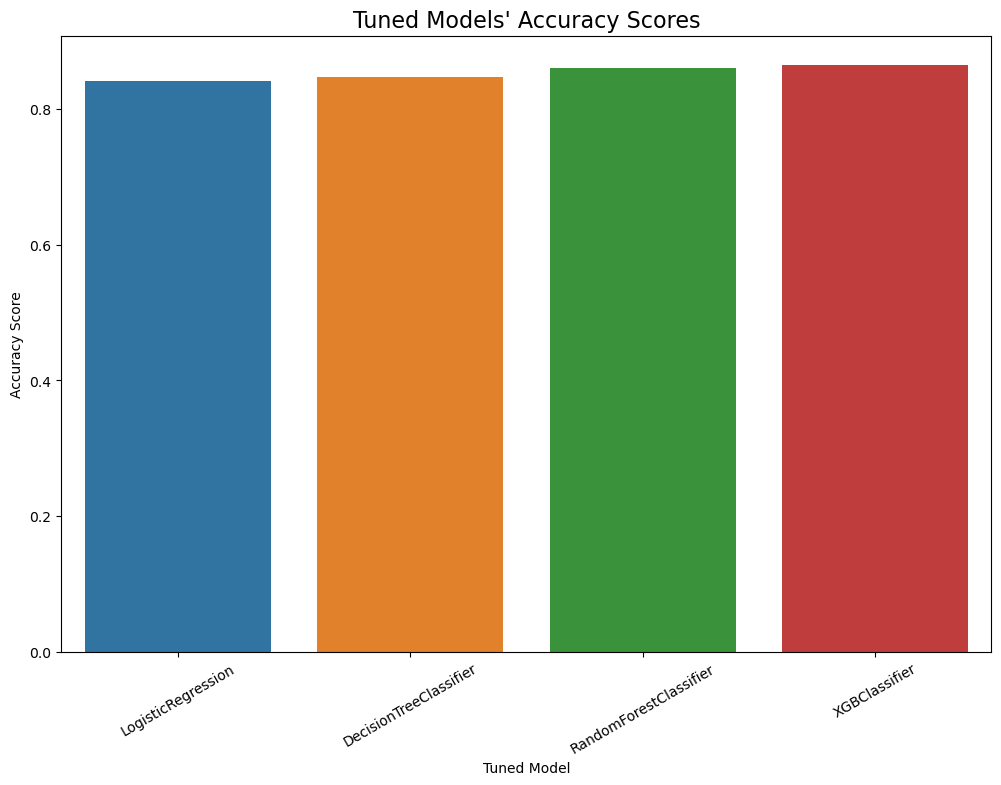

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_ph3["Tuned Model"], y=models_ph3["Accuracy Score"])
plt.title("Tuned Models' Accuracy Scores", size=16)
plt.xticks(rotation=30)
plt.show()